In [3]:
import pprint

# Data libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Classifiers 
from sklearn.ensemble import RandomForestClassifier

# Analysis libs
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif


In [4]:
malware_data_filepath = '../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
malware_data = pd.read_csv(malware_data_filepath)

Best features to drop from dataset
- 'Class', 
- 'Category', 
- 'svcscan.interactive_process_services', 
- 'handles.nport', 
- 'modules.nmodules',
- 'pslist.nprocs64bit', 
- 'callbacks.ngeneric'

In [5]:
X_drop_columns = ['Class', 
                'Category', 
                'svcscan.interactive_process_services', 
                'handles.nport', 
                'modules.nmodules',
                'pslist.nprocs64bit', 
                'callbacks.ngeneric']
X = malware_data.drop(columns=X_drop_columns)

y_column = malware_data.Class
class_le = LabelEncoder()
y = class_le.fit_transform(y_column)

In [6]:
X

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,0.085106,0.191489,389,221,26,24,116,121,87,0
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,0.042553,0.127660,392,222,26,24,118,122,87,0
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,0.050000,0.125000,395,222,26,27,118,120,88,0
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,0.062500,0.187500,395,222,26,27,118,120,88,0
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,0.130435,0.217391,392,222,26,24,118,124,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,215.486487,1453,39.270270,7973,215.486487,630,2819,...,0.078947,0.184211,389,221,26,24,116,120,86,0
58592,37,14,9.945946,190.216216,1347,36.405405,7038,190.216216,603,2394,...,0.054054,0.162162,389,221,26,24,116,116,88,0
58593,38,15,9.842105,210.026316,1448,38.105263,7982,215.729730,624,2816,...,0.100000,0.225000,389,221,26,24,116,120,88,0
58594,37,15,10.243243,215.513513,1452,39.243243,7974,215.513513,632,2819,...,0.054054,0.162162,389,221,26,24,116,120,87,0


In [7]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (41017, 50)
y_train shape: (41017,)
X_test shape: (17579, 50)
y_test shape: (17579,)


In [10]:
rf = RandomForestClassifier(n_estimators=malware_data.shape[1], random_state=42)
clf = rf.fit(X_train,y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9997724557710905


In [11]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[8786,    4],
       [   0, 8789]])

In [12]:
clf.classes_

array([0, 1])

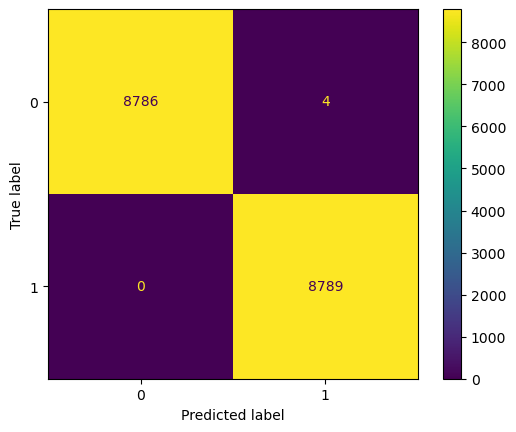

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [14]:
misclassified = np.where(y_test != y_pred)
print(len(misclassified[0]))

4


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8790
           1       1.00      1.00      1.00      8789

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



In [16]:
scores = cross_val_score(clf, X, y, cv=10)

In [20]:
print(f"Scores from CV: {scores}")
print(f"Mean of CV scores: {scores.mean()}")
print(f"Standard Deviation of CV scores: {scores.std()}")

Scores from CV: [0.9996587  1.         0.99982935 1.         0.98976109 1.
 0.9984639  0.99982932 1.         1.        ]
Mean of CV scores: 0.9987542370857355
Standard Deviation of CV scores: 0.0030306816877058874


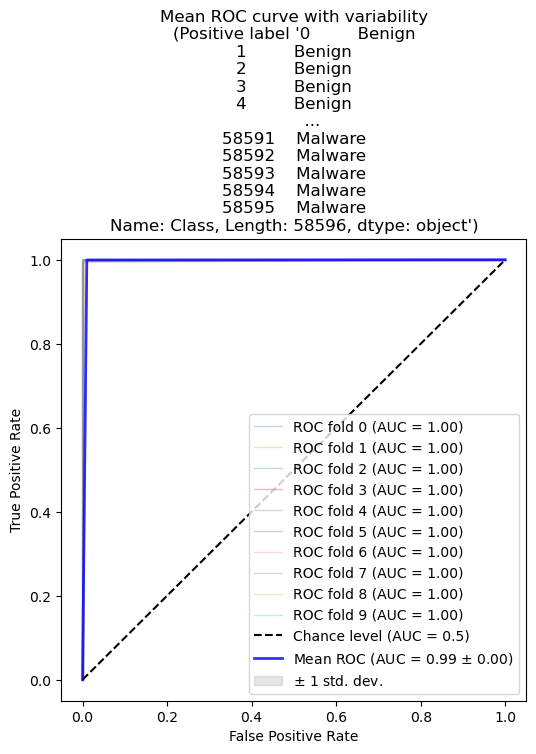

In [21]:
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
        rf.fit(X.iloc[train], y[train])
        viz = RocCurveDisplay.from_estimator(
                rf,
                X.iloc[test],
                y[test],
                name=f"ROC fold {fold}",
                alpha=0.3,
                lw=1,
                ax=ax,
                plot_chance_level=(fold == n_splits - 1),
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
)

ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"Mean ROC curve with variability\n(Positive label '{malware_data.Class}')",
)
ax.legend(loc="lower right")
plt.show()

### Report and results
